In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import math

df = pd.read_csv('GDP_Satisfaction.csv')

In [5]:
x = df['GDP'].values / 10000
x = x.reshape(-1, 1)
y = df['Satisfaction'].values.reshape(-1, 1)

In [6]:
poly = PolynomialFeatures(degree = 3)
modified_x = poly.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(modified_x, y, test_size = 0.30, random_state = 1)

In [8]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
print('Train RMSE : ', math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
print('Test RMSE : ', math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))


Train RMSE :  0.5831964543366379
Test RMSE :  0.5942872115005385


Training Points:  21
Testing Points:  9


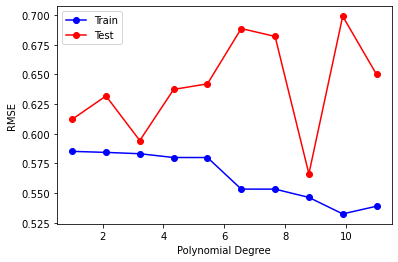

In [15]:
train_err = []
test_err = []

for i in range(1, 11):
    poly = PolynomialFeatures(degree = i)
    modified_x = poly.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(modified_x, y, test_size = 0.30, random_state = 1)
    if i == 1:
        print('Training Points: ', x_train.shape[0])
        print('Testing Points: ', x_test.shape[0])
        
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    
    train_err.append(math.sqrt(mean_squared_error(y_train, reg.predict(x_train))))
    test_err.append(math.sqrt(mean_squared_error(y_test, reg.predict(x_test))))
    
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.plot(np.linspace(1, 11, 10), train_err, 'bo-', label = 'Train')
plt.plot(np.linspace(1, 11, 10), test_err, 'ro-', label = 'Test')
plt.legend()
plt.show()